# Метод золотого сечения

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return (x - 15) ** 2 + 5

In [3]:
a, b = 2, 200
EPS = 0.0001

In [4]:
def golden_ratio(a, b, eps):
    phi = 0.5 * (1.0 + math.sqrt(5.0))
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    y1, y2 = f(x1), f(x2)
    count = 0
    data = [[a, b, b - a, (b + a) / 2, f((b + a) / 2)]]
    while math.fabs(b - a) > eps:
        if y1 >= y2:
            a = x1
        else:
            b = x2
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        y1, y2 = f(x1), f(x2)
        count += 1
        data.append([a, b, b - a, (b + a) / 2, f((b + a) / 2)])
        if abs(x1 - a) < eps and abs(x2 - b) < eps:
            break
    
    return data, count

In [5]:
data = golden_ratio(a, b, EPS)[0]

In [6]:
df = pd.DataFrame(data, columns=['a', 'b', 'length', 'x', 'f(x)'])

In [7]:
df

a           b      length           x         f(x)
0    2.000000  200.000000  198.000000  101.000000  7401.000000
1    2.000000  124.370730  122.370730   63.185365  2326.829389
2    2.000000   77.629270   75.629270   39.814635   620.766116
3    2.000000   48.741460   46.741460   25.370730   112.552036
4    2.000000   30.887811   28.887811   16.443905     7.084863
5    2.000000   19.853649   17.853649   10.926824    21.590759
6    8.819487   19.853649   11.034162   14.336568     5.440142
7   13.034162   19.853649    6.819487   16.443905     7.084863
8   13.034162   17.248837    4.214675   15.141499     5.020022
9   13.034162   15.638974    2.604812   14.336568     5.440142
10  14.029112   15.638974    1.609863   14.834043     5.027542
11  14.644024   15.638974    0.994950   15.141499     5.020022
12  14.644024   15.258937    0.614913   14.951481     5.002354
13  14.878900   15.258937    0.380037   15.068919     5.004750
14  14.878900   15.113776    0.234876   14.996338     5.000013
15  14.968615   15.113776    0.145161   15.041195     5.001697
16  14.968615   15.058329    0.089715   15.013472     5.000181
17  14.968615   15.024061    0.055447   14.996338     5.000013
18  14.989793   15.024061    0.034268   15.006927     5.000048
19  14.989793   15.010972    0.021179   15.000383     5.000000
20  14.989793   15.002883    0.013089   14.996338     5.000013
21  14.994793   15.002883    0.008090   14.998838     5.000001
22  14.997883   15.002883    0.005000   15.000383     5.000000
23  14.997883   15.000973    0.003090   14.999428     5.000000
24  14.999063   15.000973    0.001910   15.000018     5.000000
25  14.999063   15.000243    0.001180   14.999653     5.000000
26  14.999514   15.000243    0.000729   14.999879     5.000000
27  14.999793   15.000243    0.000451   15.000018     5.000000
28  14.999793   15.000071    0.000279   14.999932     5.000000
29  14.999899   15.000071    0.000172   14.999985     5.000000

In [8]:
df.to_excel('golden_ratio.xlsx')

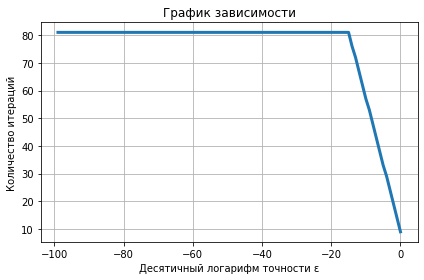

In [9]:
reference_points = [(math.log10(10 ** (-1 * p)), golden_ratio(a, b, (10 ** (-1 * p)))[1]) for p in range(100)]

fig = plt.figure()
plt.title('График зависимости')
plt.xlabel('Десятичный логарифм точности ε')
plt.ylabel('Количество итераций')
plt.plot([point[0] for point in reference_points], [point[1] for point in reference_points], lw=3)
plt.tight_layout()
plt.grid()
plt.show()